# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
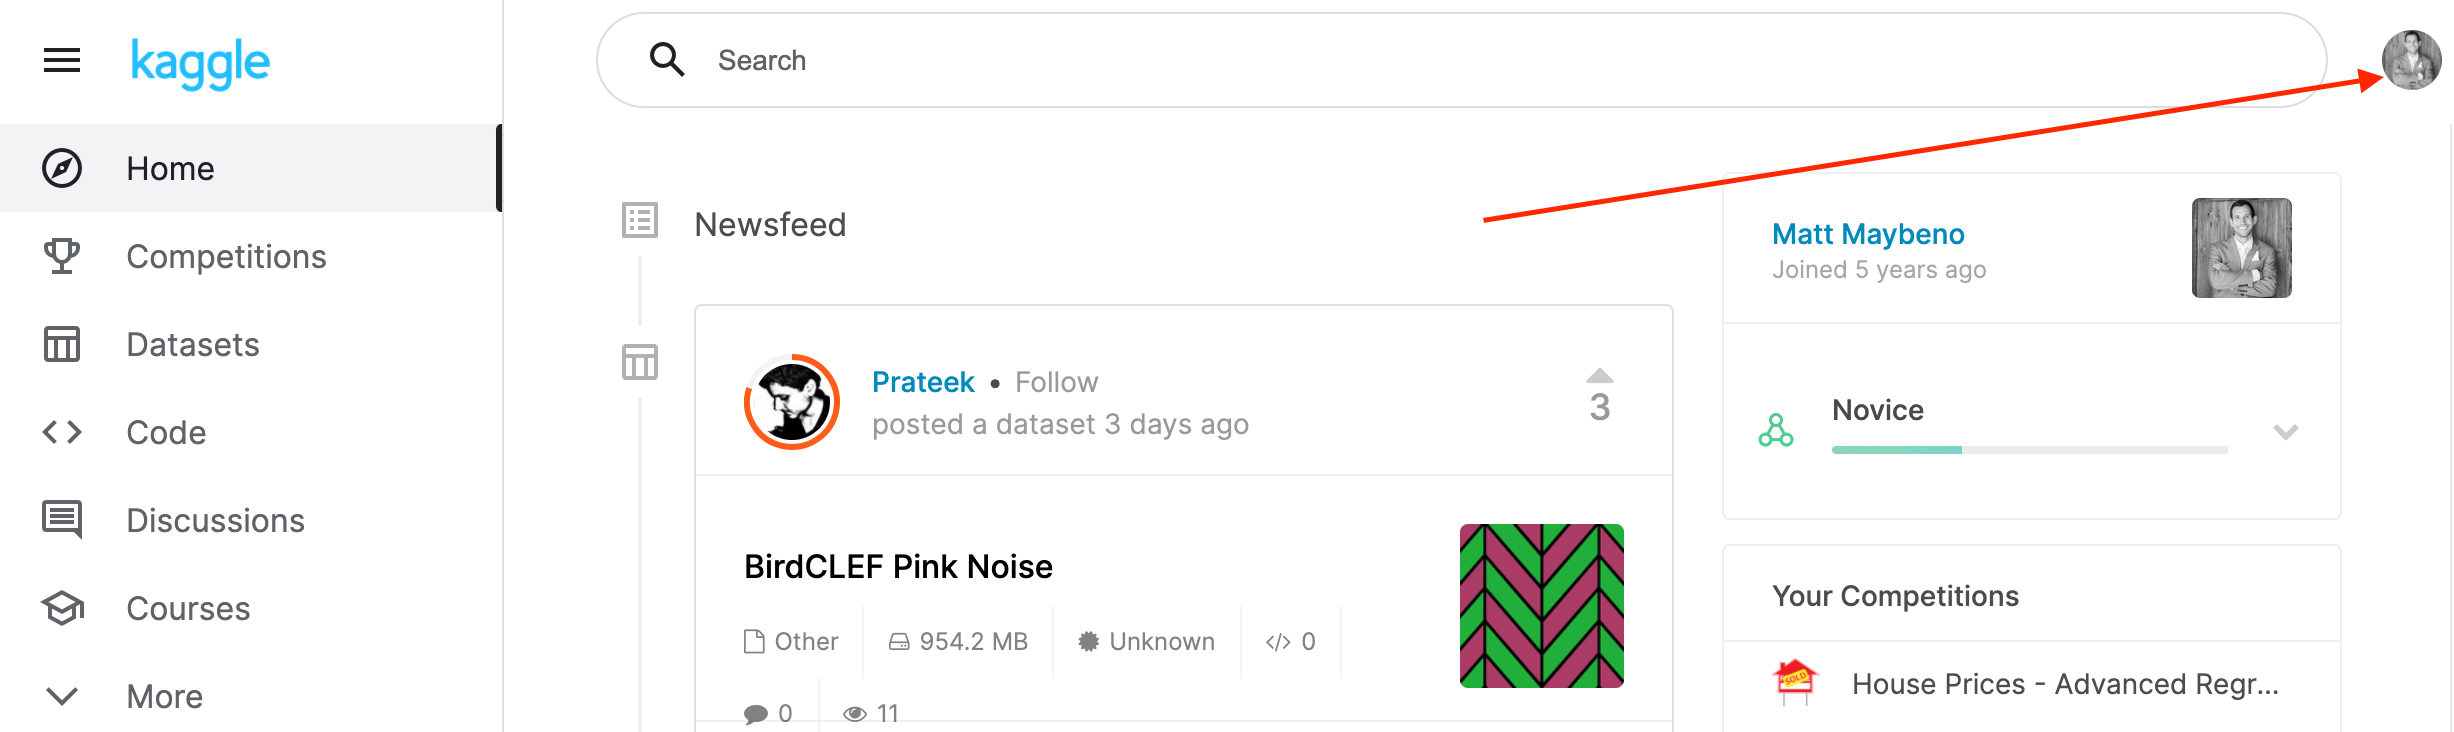
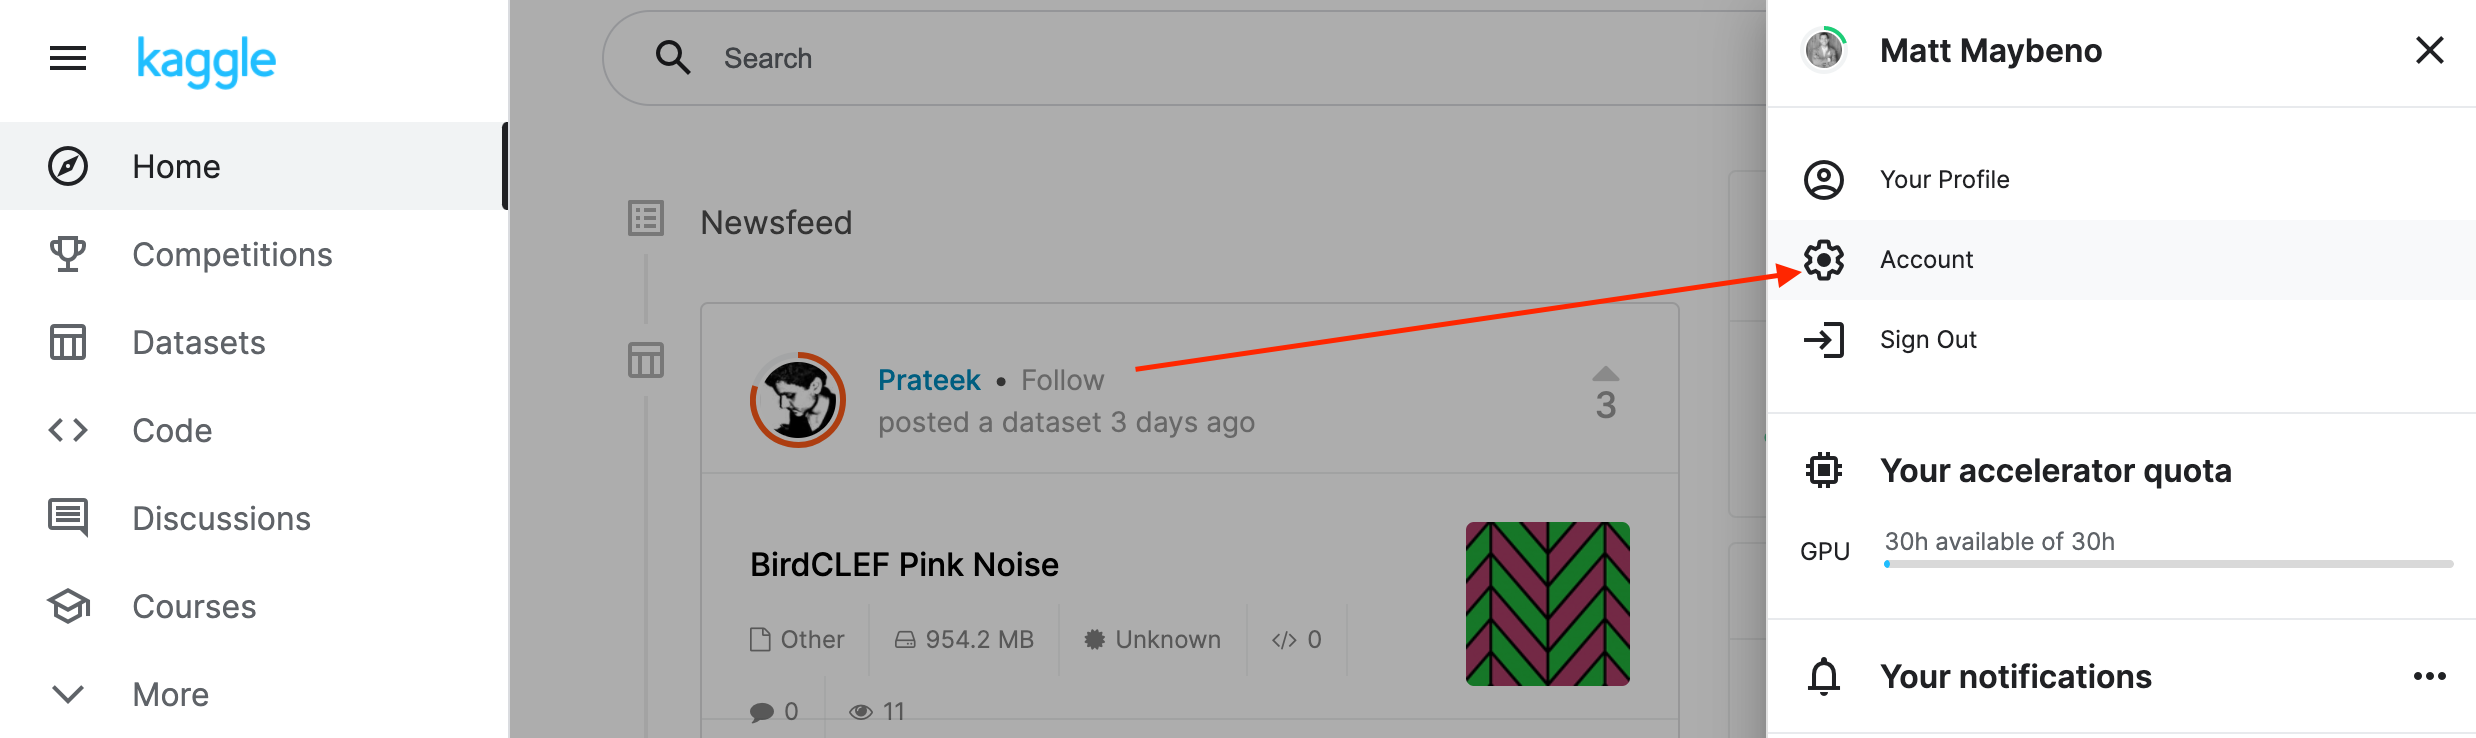
2. Scroll down to API and click Create New API Token.
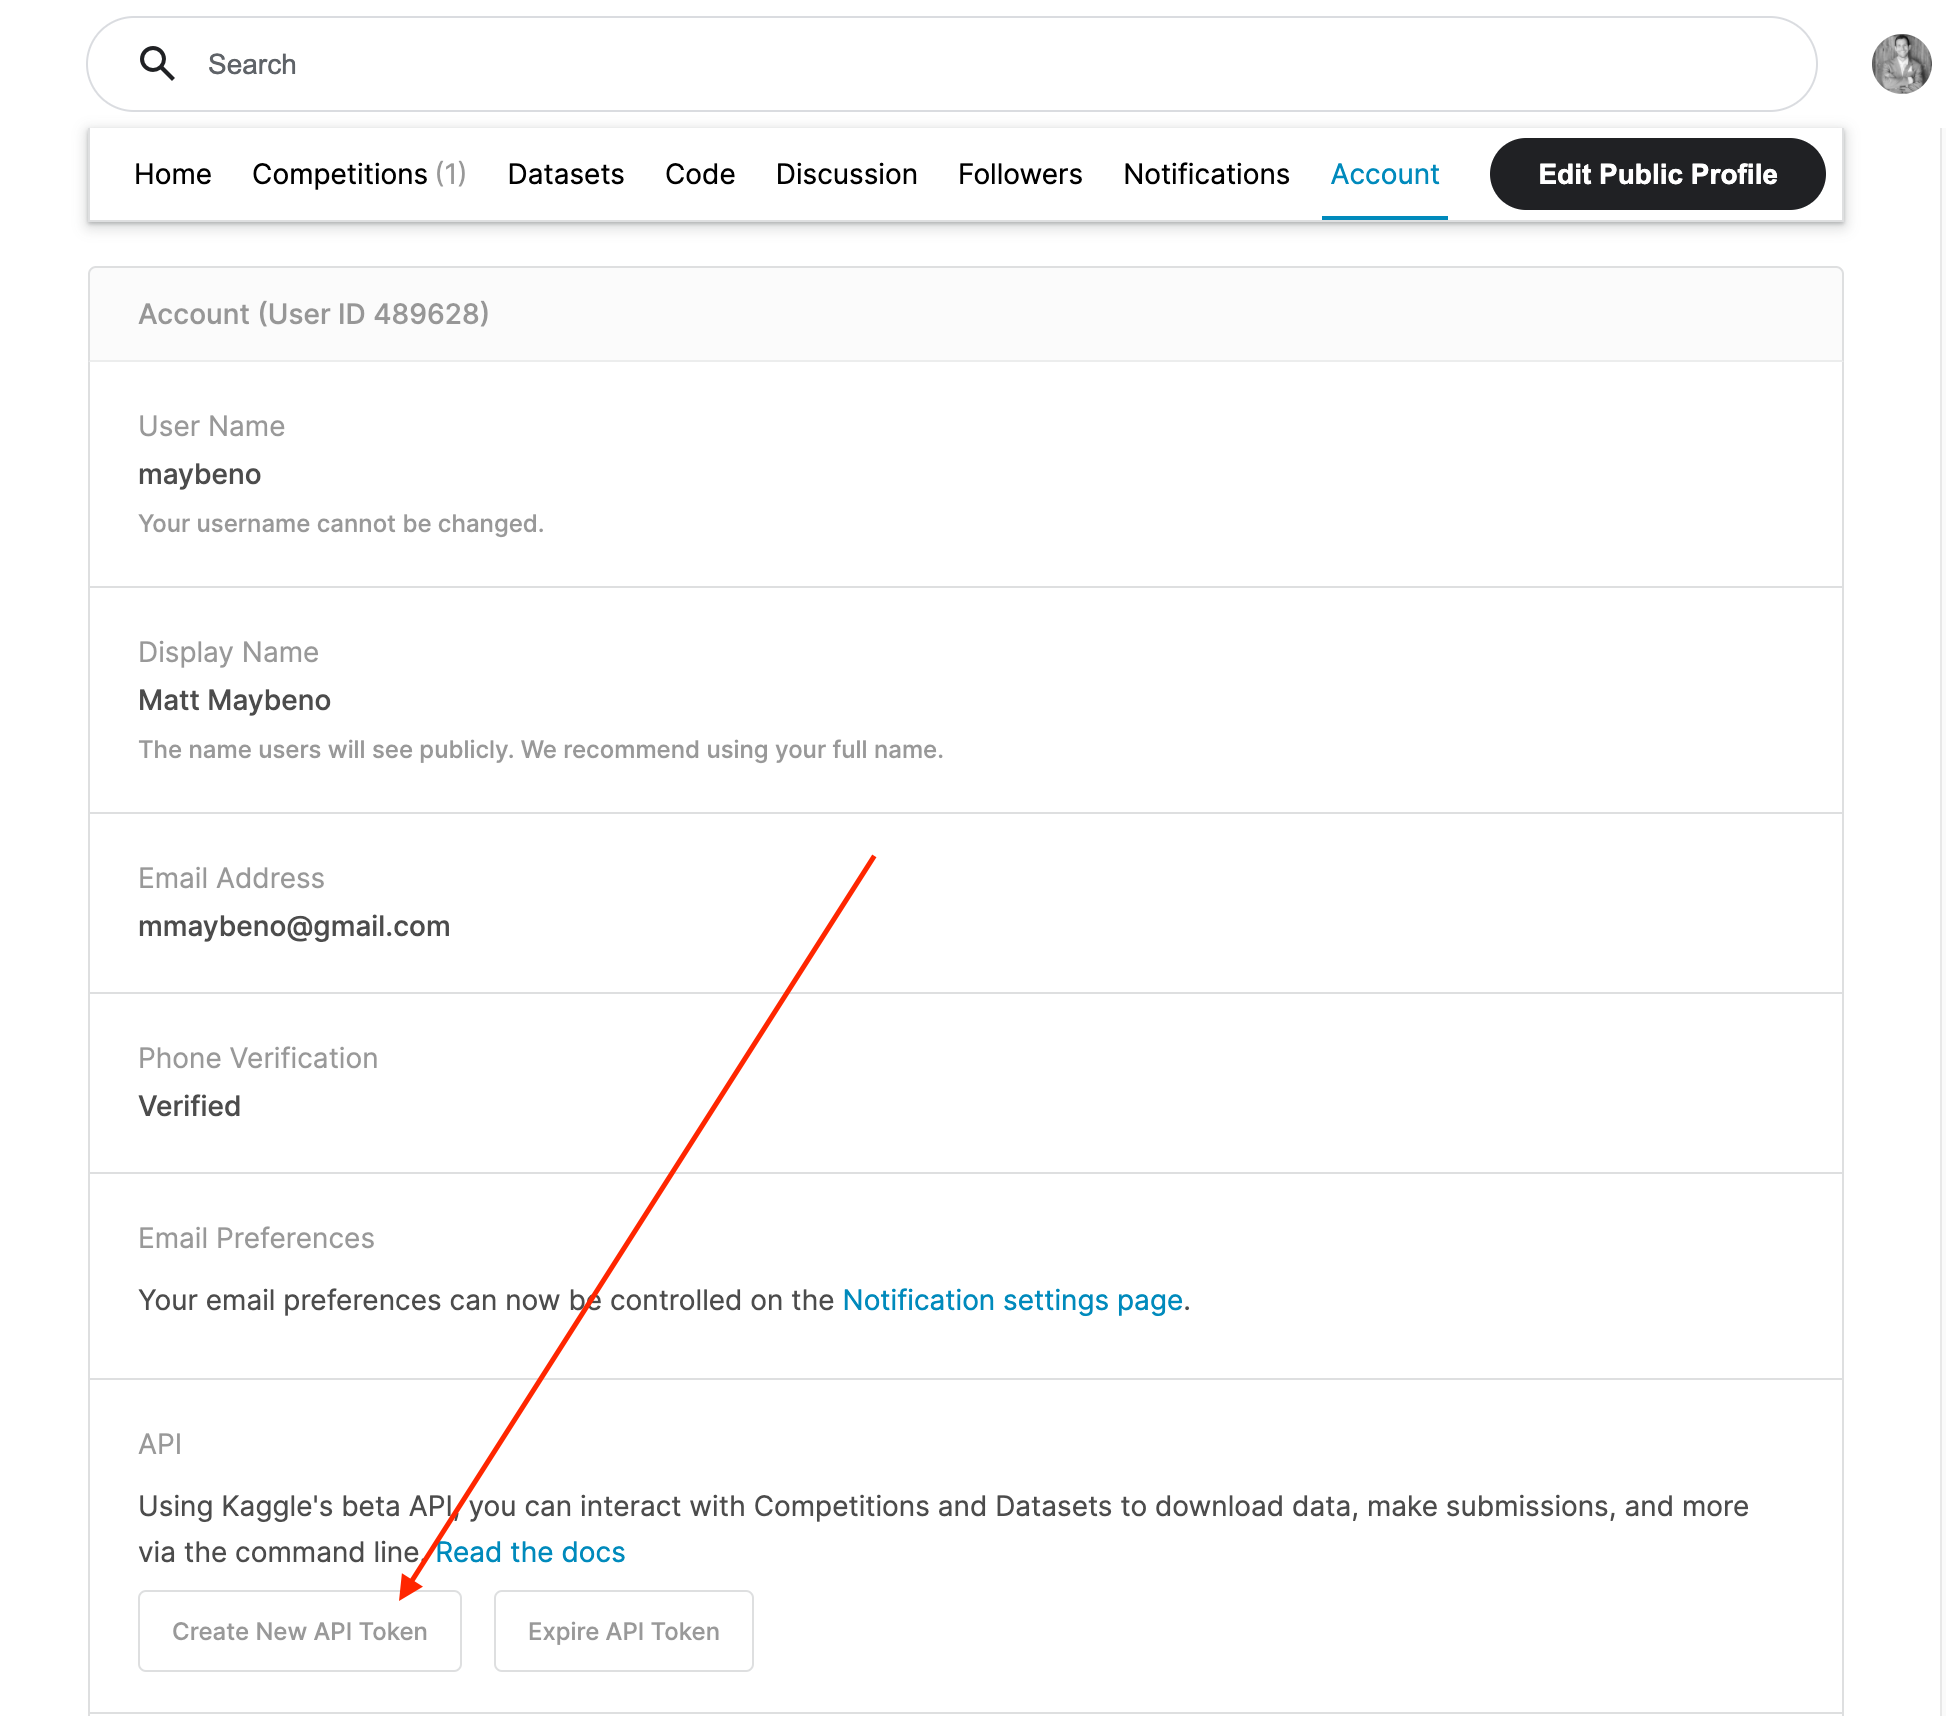
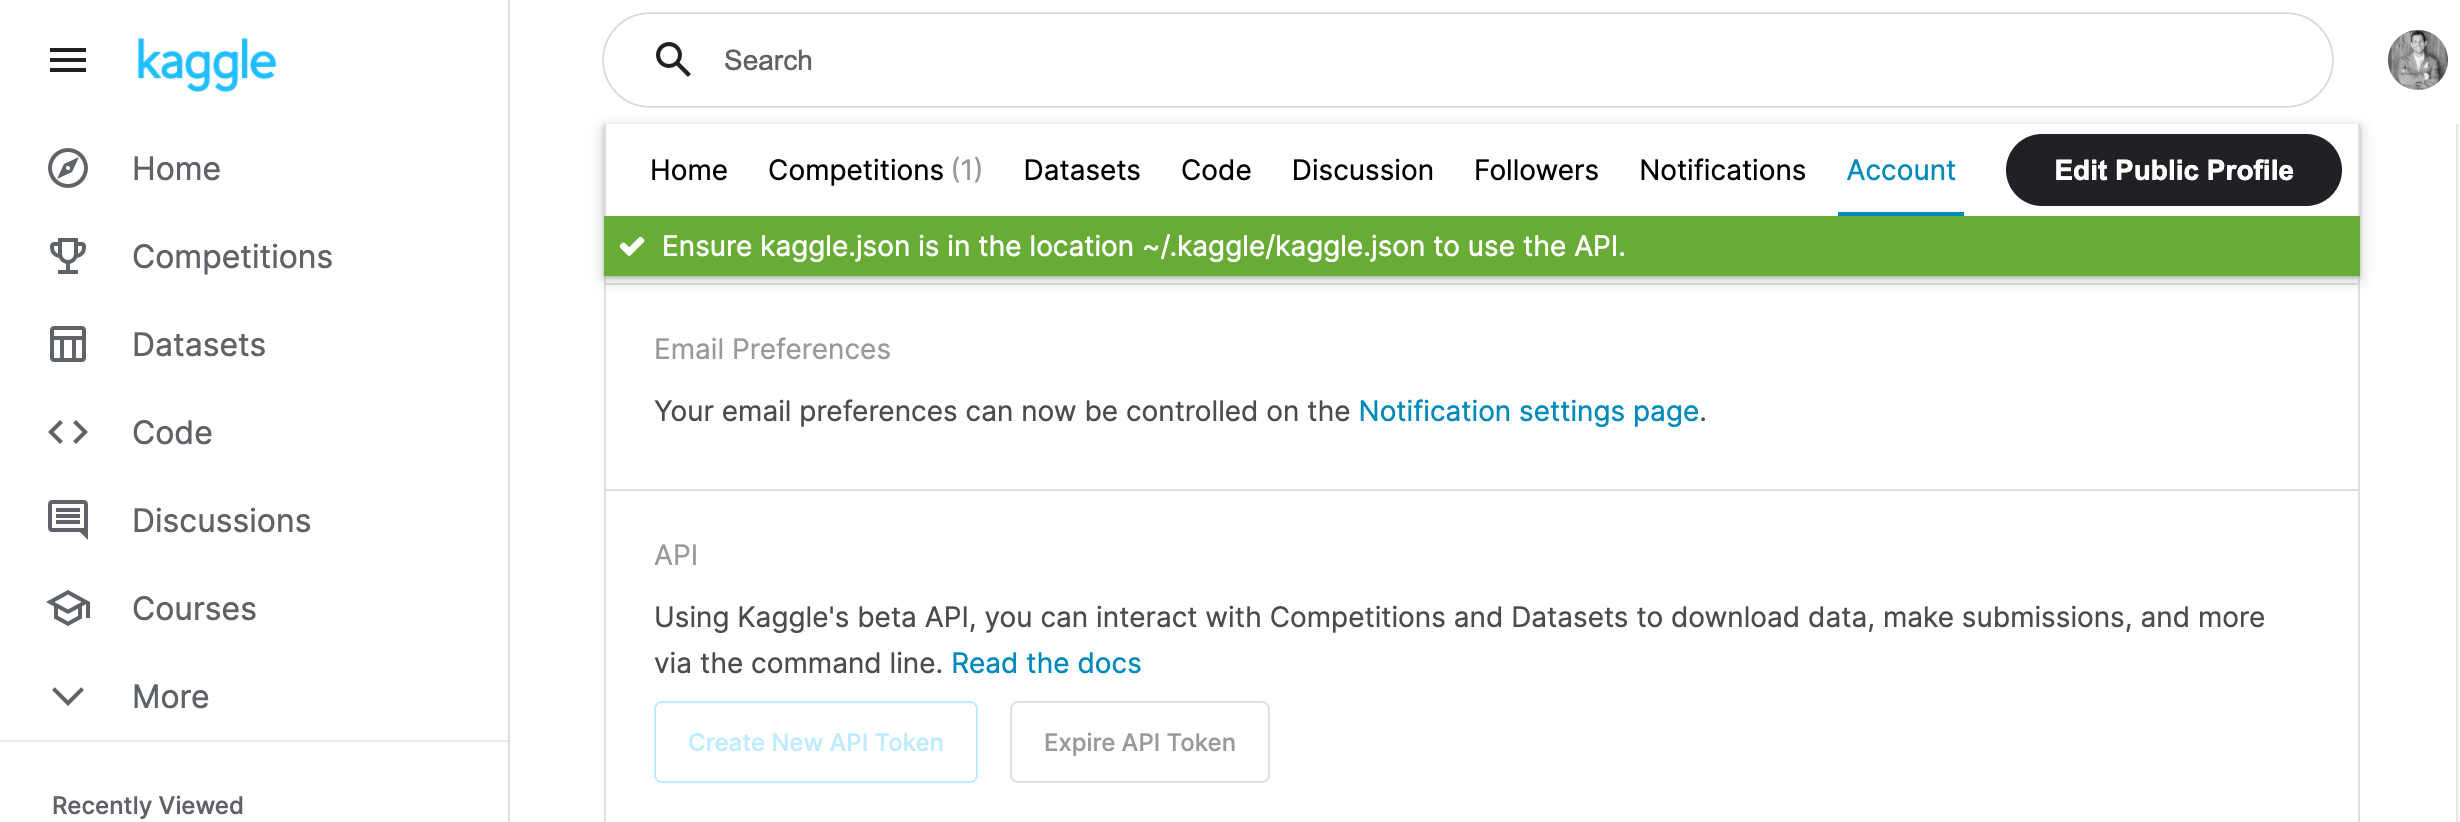
3. Open up `kaggle.json` and use the username and key.
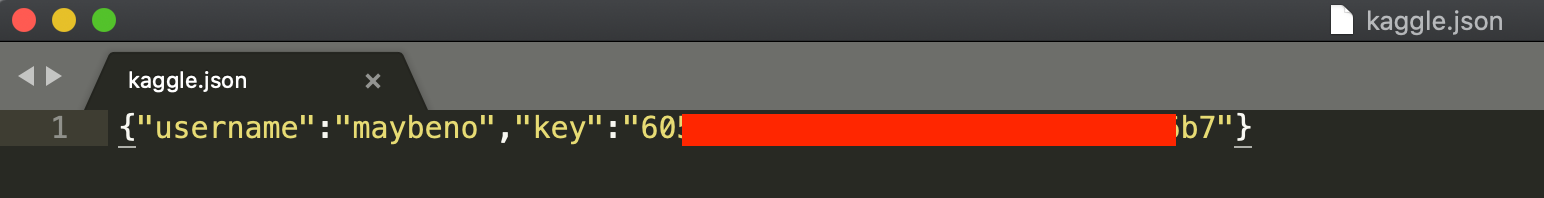

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-24.0-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.0-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
  Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Using cached graphviz-0.8.4-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached mxnet-1.9.1-py3-none-manylinux2014_x86_64.whl (49.1 MB)
Using cached graphviz-0.8.4-py2.py3-none-any.whl (16 kB)
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.3
    Uninstalling graphviz-0.20.3:
      Successfully uninstalled graphviz-0.20.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.1/98.1 kB 39.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 M

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 807.8 kB/s eta 0:00:00 kB/s eta 0:00:01:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 69.5.1
    Uninstalling setuptools-69.5.1:
      Successfully uninstalled setuptools-69.5.1


### Setup Kaggle API Key

In [1]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p ~/.kaggle
!touch ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
import os
import json

# Get the user's home directory
home_dir = os.path.expanduser("~")

# Fill in your user name and key from creating the Kaggle account and API token file
kaggle_username = "zafarabdugaffarov"
kaggle_key = "2057716522fbae8f5161b48d587f51d6"

# Create the .kaggle directory if it doesn't exist
kaggle_dir = os.path.join(home_dir, ".kaggle")
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Save API token to the kaggle.json file
kaggle_json_path = os.path.join(kaggle_dir, "kaggle.json")
with open(kaggle_json_path, "w") as f:
    json.dump({"username": kaggle_username, "key": kaggle_key}, f)

# Set appropriate permissions
os.chmod(kaggle_json_path, 0o600)

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
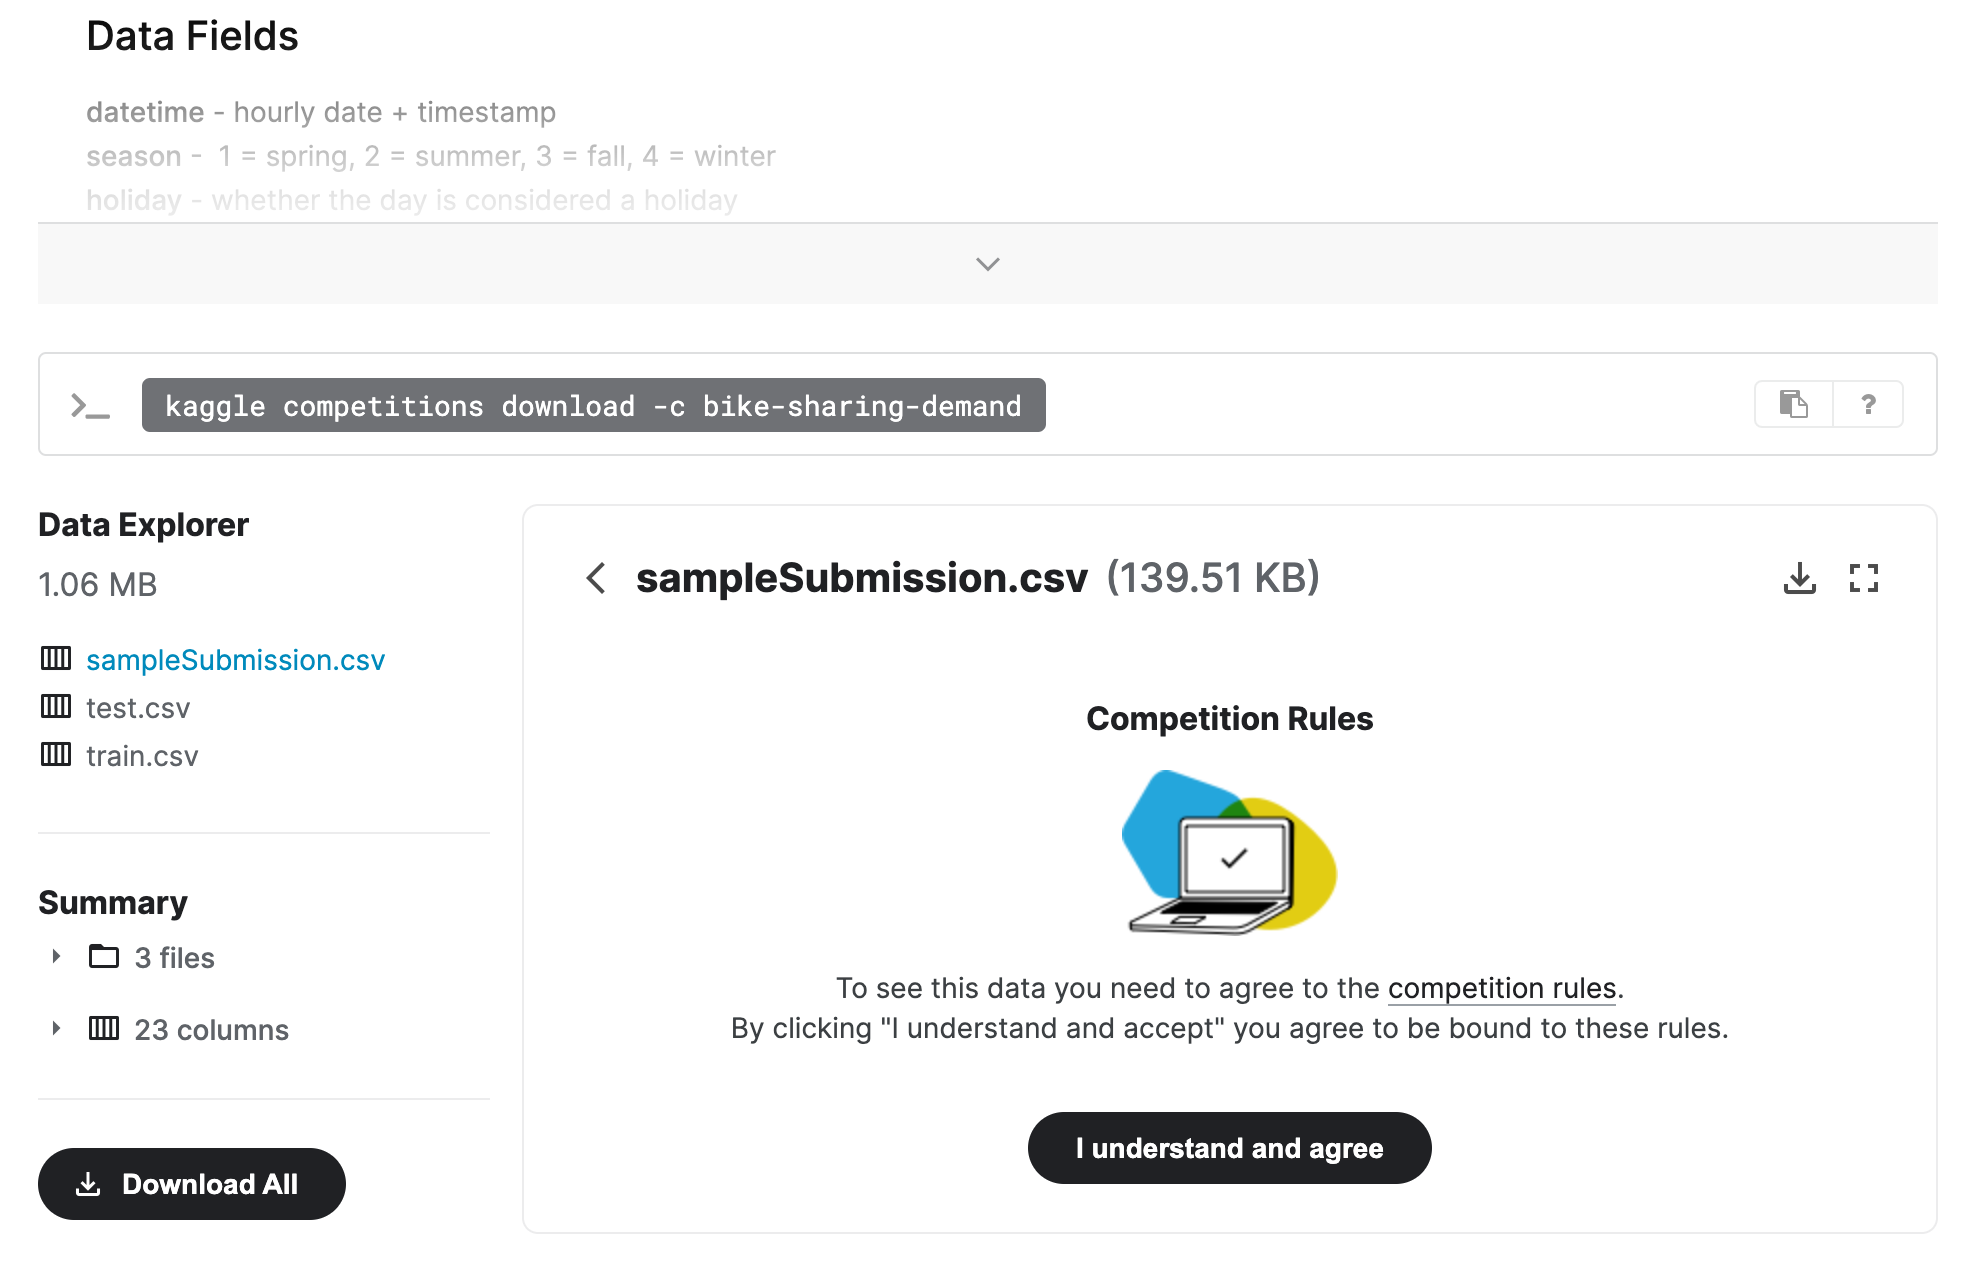

In [3]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

/bin/bash: line 1: kaggle: command not found
unzip:  cannot find or open bike-sharing-demand.zip, bike-sharing-demand.zip.zip or bike-sharing-demand.zip.ZIP.


In [1]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [2]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv')
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [3]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count  
count  10886.000000  
mean     191.574132  
std      181.144454  
min        1.000000  
25%       42.000000  
50%      145.000000  
75%      284.000000  
max      977.000000

In [4]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv')
test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [5]:
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [6]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv')
submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [10]:
predictor = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_105322"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_105322"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   4.42 GB / 5.36 GB (82.4%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", T

[1000]	valid_set's rmse: 131.684
[2000]	valid_set's rmse: 130.67
[3000]	valid_set's rmse: 130.626
[1000]	valid_set's rmse: 135.592
[1000]	valid_set's rmse: 133.481
[2000]	valid_set's rmse: 132.323
[3000]	valid_set's rmse: 131.618
[4000]	valid_set's rmse: 131.443
[5000]	valid_set's rmse: 131.265
[6000]	valid_set's rmse: 131.277
[7000]	valid_set's rmse: 131.443
[1000]	valid_set's rmse: 128.503
[2000]	valid_set's rmse: 127.654
[3000]	valid_set's rmse: 127.227
[4000]	valid_set's rmse: 127.105
[1000]	valid_set's rmse: 134.135
[2000]	valid_set's rmse: 132.272
[3000]	valid_set's rmse: 131.286
[4000]	valid_set's rmse: 130.752
[5000]	valid_set's rmse: 130.363
[6000]	valid_set's rmse: 130.509
[1000]	valid_set's rmse: 136.168
[2000]	valid_set's rmse: 135.138
[3000]	valid_set's rmse: 135.029
[1000]	valid_set's rmse: 134.061
[2000]	valid_set's rmse: 133.034
[3000]	valid_set's rmse: 132.182
[4000]	valid_set's rmse: 131.997
[5000]	valid_set's rmse: 131.643
[6000]	valid_set's rmse: 131.504
[7000]	vali

	-131.4609	 = Validation score   (-root_mean_squared_error)
	51.98s	 = Training   runtime
	8.0s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 328.61s of the 528.64s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 130.818
[1000]	valid_set's rmse: 133.204
[1000]	valid_set's rmse: 130.928
[1000]	valid_set's rmse: 126.846
[1000]	valid_set's rmse: 131.426
[1000]	valid_set's rmse: 133.655
[1000]	valid_set's rmse: 132.155
[1000]	valid_set's rmse: 130.62


	-131.0542	 = Validation score   (-root_mean_squared_error)
	12.82s	 = Training   runtime
	1.39s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 312.64s of the 512.68s of remaining time.
	-116.5484	 = Validation score   (-root_mean_squared_error)
	19.04s	 = Training   runtime
	0.82s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 291.92s of the 491.96s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4050.
	Ran out of time, early stopping on iteration 3990.
	Ran out of time, early stopping on iteration 4363.
	Ran out of time, early stopping on iteration 4403.
	Ran out of time, early stopping on iteration 4811.
	-130.5713	 = Validation score   (-root_mean_squared_error)
	240.14s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 51.49s of the 251.

[1000]	valid_set's rmse: 60.9213
[2000]	valid_set's rmse: 60.0388
[3000]	valid_set's rmse: 59.8521
[1000]	valid_set's rmse: 61.2639
[2000]	valid_set's rmse: 60.3481
[1000]	valid_set's rmse: 64.0419
[2000]	valid_set's rmse: 62.8485
[1000]	valid_set's rmse: 64.4371
[2000]	valid_set's rmse: 62.5034
[3000]	valid_set's rmse: 62.3424
[1000]	valid_set's rmse: 58.7129
[2000]	valid_set's rmse: 57.6587
[1000]	valid_set's rmse: 63.5234
[2000]	valid_set's rmse: 62.3591
[1000]	valid_set's rmse: 62.7864
[2000]	valid_set's rmse: 61.7307
[3000]	valid_set's rmse: 61.6274
[1000]	valid_set's rmse: 57.7822
[2000]	valid_set's rmse: 57.105


	-60.4701	 = Validation score   (-root_mean_squared_error)
	46.59s	 = Training   runtime
	3.89s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 144.17s of the 144.15s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-55.134	 = Validation score   (-root_mean_squared_error)
	12.76s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 130.87s of the 130.85s of remaining time.
	-53.4515	 = Validation score   (-root_mean_squared_error)
	42.03s	 = Training   runtime
	0.72s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 87.48s of the 87.46s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1047.
	Ran out of time, early stopping on iteration 1188.
	Ran out of time, early stopping on iteration 1307.
	Ran

### Review AutoGluon's training run with ranking of models that did the best.

In [11]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -52.865846      13.389465  521.269552                0.000817           0.287105            3       True         15
1   RandomForestMSE_BAG_L2  -53.451478      12.257624  414.610369                0.722348          42.028500            2       True         12
2     ExtraTreesMSE_BAG_L2  -53.859260      12.389017  387.974257                0.853741          15.392388            2       True         14
3          LightGBM_BAG_L2  -55.133954      11.748551  385.337010                0.213275          12.755141            2       True         11
4          CatBoost_BAG_L2  -55.468453      11.599283  450.806419                0.064007          78.224550            2       True         13
5        LightGBMXT_BAG_L2  -60.470103      15.426254  419.170218         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -

### Create predictions from test dataset

In [12]:
predictions = predictor.predict(test)
predictions = {'datetime': test['datetime'], 'Pred_count': predictions}
predictions = pd.DataFrame(data=predictions)
predictions.head()

/opt/conda/lib/python3.10/site-packages/autogluon/features/generators/fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


datetime  Pred_count
0  2011-01-20 00:00:00   23.776628
1  2011-01-20 01:00:00   42.635658
2  2011-01-20 02:00:00   46.400299
3  2011-01-20 03:00:00   49.024002
4  2011-01-20 04:00:00   51.627224

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [13]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

Pred_count
count  6493.000000
mean    101.049049
std      90.335938
min       3.017506
25%      20.798779
50%      63.234932
75%     169.659332
max     362.337433

In [14]:
# How many negative values do we have?
neg = predictions.groupby(predictions['Pred_count'])

# lambda function
def minus(val):
   return val[val < 0].sum()

print(neg['Pred_count'].agg([('negcount', minus)]))

            negcount
Pred_count          
3.017506         0.0
3.048299         0.0
3.086751         0.0
3.100743         0.0
3.101935         0.0
...              ...
361.426758       0.0
361.816986       0.0
362.043579       0.0
362.062012       0.0
362.337433       0.0

[6263 rows x 1 columns]


In [15]:
# Set them to zero
predictions[predictions['Pred_count']<0] = 0

In [16]:
predictions.describe()

Pred_count
count  6493.000000
mean    101.049049
std      90.335938
min       3.017506
25%      20.798779
50%      63.234932
75%     169.659332
max     362.337433

In [17]:
predictions.head()

datetime  Pred_count
0  2011-01-20 00:00:00   23.776628
1  2011-01-20 01:00:00   42.635658
2  2011-01-20 02:00:00   46.400299
3  2011-01-20 03:00:00   49.024002
4  2011-01-20 04:00:00   51.627224

### Set predictions to submission dataframe, save, and submit

In [18]:
submission["count"] = predictions['Pred_count']
submission.to_csv("submission.csv", index=False)

In [21]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 612kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-29 11:12:02  first raw submission  complete  1.7998       1.7998        


#### Initial score of `1.7998`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

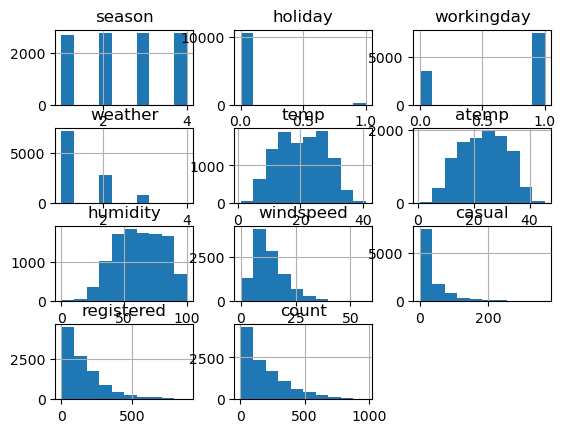

In [23]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [26]:
# create a new feature
# Assuming train and test are your DataFrames
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

# Now, you can access the components of the datetime column
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [27]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [28]:
# View are new feature
train.head()

datetime season  holiday  workingday weather  temp   atemp  \
0 2011-01-01 00:00:00      1        0           0       1  9.84  14.395   
1 2011-01-01 01:00:00      1        0           0       1  9.02  13.635   
2 2011-01-01 02:00:00      1        0           0       1  9.02  13.635   
3 2011-01-01 03:00:00      1        0           0       1  9.84  14.395   
4 2011-01-01 04:00:00      1        0           0       1  9.84  14.395   

   humidity  windspeed  casual  registered  count  year  month  day  hour  
0        81        0.0       3          13     16  2011      1    1     0  
1        80        0.0       8          32     40  2011      1    1     1  
2        80        0.0       5          27     32  2011      1    1     2  
3        75        0.0       3          10     13  2011      1    1     3  
4        75        0.0       0           1      1  2011      1    1     4

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

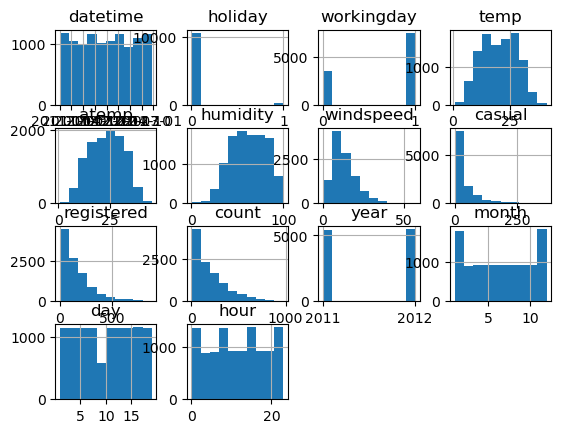

In [29]:
# View histogram of all features again now with the hour feature
train.hist()

## Step 5: Rerun the model with the same settings as before, just with more features

In [30]:
predictor_new_features = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality')

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_111603"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_111603"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   3.05 GB / 5.36 GB (57.0%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Train Data Rows:    10886
Train Data Columns: 13
Label Column: count
Preprocessing data ...
/opt/conda/lib/python3.10/site-packages/autogluon/tabular/learner/default_learner.py:215: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context("mode.use_inf_as_na", 

[1000]	valid_set's rmse: 35.722
[2000]	valid_set's rmse: 34.0646
[3000]	valid_set's rmse: 33.7501
[4000]	valid_set's rmse: 33.5663
[5000]	valid_set's rmse: 33.5927
[1000]	valid_set's rmse: 36.6943
[2000]	valid_set's rmse: 34.7009
[3000]	valid_set's rmse: 34.2654
[4000]	valid_set's rmse: 34.0805
[5000]	valid_set's rmse: 34.0068
[6000]	valid_set's rmse: 33.9926
[7000]	valid_set's rmse: 34.0148
[8000]	valid_set's rmse: 34.0505
[1000]	valid_set's rmse: 37.0225
[2000]	valid_set's rmse: 34.5264
[3000]	valid_set's rmse: 33.9428
[4000]	valid_set's rmse: 33.6752
[5000]	valid_set's rmse: 33.5411
[6000]	valid_set's rmse: 33.4628
[7000]	valid_set's rmse: 33.3908
[8000]	valid_set's rmse: 33.3862
[9000]	valid_set's rmse: 33.3645
[10000]	valid_set's rmse: 33.3686
[1000]	valid_set's rmse: 38.1752
[2000]	valid_set's rmse: 36.5188
[3000]	valid_set's rmse: 36.1264
[4000]	valid_set's rmse: 35.9954
[5000]	valid_set's rmse: 35.9337
[6000]	valid_set's rmse: 35.9463
[1000]	valid_set's rmse: 38.9031
[2000]	val

	-34.4539	 = Validation score   (-root_mean_squared_error)
	82.09s	 = Training   runtime
	14.9s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 290.28s of the 489.88s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy


[1000]	valid_set's rmse: 33.1713
[2000]	valid_set's rmse: 33.0077
[1000]	valid_set's rmse: 32.8635
[2000]	valid_set's rmse: 32.6404
[1000]	valid_set's rmse: 31.9543
[2000]	valid_set's rmse: 31.343
[3000]	valid_set's rmse: 30.9039
[4000]	valid_set's rmse: 30.8612
[1000]	valid_set's rmse: 35.8483
[2000]	valid_set's rmse: 35.4773
[3000]	valid_set's rmse: 35.3993
[1000]	valid_set's rmse: 35.5388
[1000]	valid_set's rmse: 31.6283
[1000]	valid_set's rmse: 37.9327
[2000]	valid_set's rmse: 37.4577
[1000]	valid_set's rmse: 34.9434
[2000]	valid_set's rmse: 34.6719


	-33.9173	 = Validation score   (-root_mean_squared_error)
	30.95s	 = Training   runtime
	3.36s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 252.17s of the 451.77s of remaining time.
	-38.425	 = Validation score   (-root_mean_squared_error)
	20.96s	 = Training   runtime
	0.61s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 229.93s of the 429.54s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2051.
	Ran out of time, early stopping on iteration 2220.
	Ran out of time, early stopping on iteration 2283.
	Ran out of time, early stopping on iteration 2382.
	Ran out of time, early stopping on iteration 2447.
	Ran out of time, early stopping on iteration 2516.
	Ran out of time, early stopping on iteration 2871.
	Ran out of time, early stopping on iteration 3160.
	-34.342	 = Validation score   (-root_mean_squared

[1000]	valid_set's rmse: 30.5043
[1000]	valid_set's rmse: 31.5792


	-31.1511	 = Validation score   (-root_mean_squared_error)
	19.62s	 = Training   runtime
	1.04s	 = Validation runtime
Fitting model: LightGBM_BAG_L2 ... Training model for up to 175.13s of the 175.11s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	-30.5897	 = Validation score   (-root_mean_squared_error)
	14.36s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L2 ... Training model for up to 160.18s of the 160.17s of remaining time.
	-31.6744	 = Validation score   (-root_mean_squared_error)
	51.4s	 = Training   runtime
	0.82s	 = Validation runtime
Fitting model: CatBoost_BAG_L2 ... Training model for up to 107.29s of the 107.28s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 866.
	Ran out of time, early stopping on iteration 946.
	Ran out of time, early stopping on iteration 931.
	Ran 

In [31]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.240410      22.095974  552.836447                0.001155           0.359319            3       True         14
1          CatBoost_BAG_L2  -30.515401      19.975629  467.097923                0.096180         102.799073            2       True         12
2          LightGBM_BAG_L2  -30.589689      20.138117  378.655426                0.258667          14.356575            2       True         10
3        LightGBMXT_BAG_L2  -31.151067      20.918398  383.922330                1.038949          19.623480            2       True          9
4     ExtraTreesMSE_BAG_L2  -31.485109      20.621979  380.036663                0.742529          15.737813            2       True         13
5   RandomForestMSE_BAG_L2  -31.674417      20.701023  415.698001         

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,


In [33]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features = {'datetime': test['datetime'], 'Pred_count': predictions_new_features}
predictions_new_features = pd.DataFrame(data=predictions_new_features)
predictions_new_features.head()

datetime  Pred_count
0 2011-01-20 00:00:00   15.958500
1 2011-01-20 01:00:00   11.255019
2 2011-01-20 02:00:00   10.674420
3 2011-01-20 03:00:00    9.340588
4 2011-01-20 04:00:00    7.769901

In [34]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features['Pred_count']<0] = 0

In [35]:
predictions_new_features.describe()

datetime   Pred_count
count                           6493  6493.000000
mean   2012-01-13 09:27:47.765285632   154.844589
min              2011-01-20 00:00:00     1.780506
25%              2011-07-22 15:00:00    53.331760
50%              2012-01-20 23:00:00   119.993599
75%              2012-07-20 17:00:00   220.551758
max              2012-12-31 23:00:00   816.064575
std                              NaN   133.741531

In [43]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features['Pred_count']
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [44]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 660kB/s]
Successfully submitted to Bike Sharing Demand

In [45]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-29 11:42:11  new features          complete  0.68259      0.68259       
submission.csv               2024-04-29 11:12:02  first raw submission  complete  1.7998       1.7998        


#### New Score of `0.68259?`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [7]:
import autogluon.core as ag
from autogluon.common import space
from autogluon.tabular import TabularPredictor

nn_options = {  
    'dropout_prob': space.Real(0.0, 0.5, default=0.1),  # dropout probability 
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': space.Int(lower=26, upper=66, default=36),  # number of leaves in trees
}

hyperparameters = {  # hyperparameters of each model type
                   'GBM': gbm_options,
                   'NN_TORCH': nn_options, 
                  }  

num_trials = 3  # try at most 3 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(
    label="count", problem_type="regression", eval_metric="rmse"
    ).fit(
    train_data=train.drop(['casual', 'registered'], axis=1),
    time_limit=600,
    presets='best_quality', hyperparameters=hyperparameters, hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20240429_124008"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
/opt/conda/lib/python3.10/site-packages/pkg_resources/__init__.py:2832: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20240429_124008"
AutoGluon Version:  0.8.2
Python Version:     3.10.14
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Mar 23 09:49:55 UTC 2024
Disk Space Avail:   1.63 GB / 5.36 GB (30.4%)
	We recommend a minimum available disk space of 10 GB, and large dataset

  0%|          | 0/3 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray is required to train folds in parallel for TabularPredictor or HPO for MultiModalPredictor. A quick tip is to install via `pip install ray==2.6.3`
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 12.0.1. Please consider upgrading.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/dask/dataframe/__init__.py:31: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with S

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, stopping training early. (Stopping on epoch 35)
	Ran out of time, stopping training early. (Stopping on epoch 40)
	Ran out of time, stopping training early. (Stopping on epoch 47)
	Ran out of time, stopping training early. (Stopping on epoch 51)
	Ran out of time, stopping training early. (Stopping on epoch 56)
	Ran out of time, stopping training early. (Stopping on epoch 69)
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L1/T1 ...
	-142.041	 = Validation score   (-root_mean_squared_error)
	161.57s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 414.12s of remaining time.
	-134.003	 = Validation score   (-root_mean_squared_error)
	1.05s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 2 L2 models ...
Hyperparameter tuning model: 

  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
Fitted model: LightGBM_BAG_L2/T1 ...
	-134.4063	 = Validation score   (-root_mean_squared_error)
	5.23s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-134.1484	 = Validation score   (-root_mean_squared_error)
	3.48s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T3 ...
	-134.5661	 = Validation score   (-root_mean_squared_error)
	5.08s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: NeuralNetTorch_BAG_L2 ... Tuning model for up to 185.84s of the 398.52s of remaining time.


  0%|          | 0/3 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: NeuralNetTorch_BAG_L2/T1 ...
	-137.7589	 = Validation score   (-root_mean_squared_error)
	109.39s	 = Training   runtime
	0.0s	 = Validation runtime
Repeating k-fold bagging: 2/20
Fitting model: LightGBM_BAG_L2/T1 ... Training model for up to 289.07s of the 289.02s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	-134.001	 = Validation score   (-root_mean_squared_error)
	9.29s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T2 ... Training model for up to 284.82s of the 284.77s of remaining time.
	Fitting 8 child models (S2F1 - S2F8) | Fitting with SequentialLocalFoldFittingStrategy
	-133.7499	 = Validation score   (-root_mean_squared_error)
	6.75s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: LightGBM_BAG_L2/T3 ... Training model for up

In [8]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                      model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0       WeightedEnsemble_L3 -133.598151       0.378901  419.581011                0.001148           0.681137            3       True         10
1        LightGBM_BAG_L2/T2 -133.749929       0.087237  184.153805                0.086385           6.749786            2       True          7
2        LightGBM_BAG_L2/T1 -134.001034       0.070539  186.694348                0.069688           9.290329            2       True          6
3       WeightedEnsemble_L2 -134.002986       0.003735  172.454185                0.003287           1.053466            2       True          5
4        LightGBM_BAG_L1/T3 -134.194130       0.000139    4.532218                0.000139           4.532218            1       True          3
5        LightGBM_BAG_L2/T3 -134.224763       0.077487  186.282038  

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L1/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'NeuralNetTorch_BAG_L2/T1': 'StackerEnsembleModel_TabularNeuralNetTorch',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -135.4732072756916,
  'LightGBM_BAG_L1/T2': -135.02952795945737,
  'LightGBM_BAG_L1/T3': -134.19413006667938,
  'NeuralNetTorch_BAG_L1/T1': -142.04103202606262,
  'WeightedEnsemble_L2': -134.00298642499382,
  'LightGBM_BAG_L2/T1': -134.00103350983295,
  'LightGBM_BAG_L2/T2': -133.74992855442642,
  'LightGBM_BAG_L2/T3': -134.22476301488,
  'NeuralNetTorch_BAG_L2/T1': -137.5

In [9]:
prediction_new_hpo = predictor_new_hpo.predict(test)
prediction_new_hpo = {'datetime': test['datetime'], 'Pred_count': prediction_new_hpo}
prediction_new_hpo = pd.DataFrame(data=prediction_new_hpo)
prediction_new_hpo.head()

/opt/conda/lib/python3.10/site-packages/autogluon/features/generators/fillna.py:58: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  X.fillna(self._fillna_feature_map, inplace=True, downcast=False)


datetime  Pred_count
0  2011-01-20 00:00:00   72.947769
1  2011-01-20 01:00:00   50.996433
2  2011-01-20 02:00:00   50.996471
3  2011-01-20 03:00:00   66.710915
4  2011-01-20 04:00:00   66.710983

In [10]:
# Remember to set all negative values to zero
prediction_new_hpo[prediction_new_hpo['Pred_count']<0] = 0

In [12]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('submission.csv')
submission_new_hpo["count"] = prediction_new_hpo['Pred_count']
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [16]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

1179.07s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 576kB/s]
Successfully submitted to Bike Sharing Demand

In [17]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

1188.97s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-29 12:53:53  new features with hyperparameters  complete  1.29634      1.29634       
submission_new_features.csv  2024-04-29 11:42:11  new features                       complete  0.68259      0.68259       
submission.csv               2024-04-29 11:12:02  first raw submission               complete  1.7998       1.7998        


#### New Score of `1.29634`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

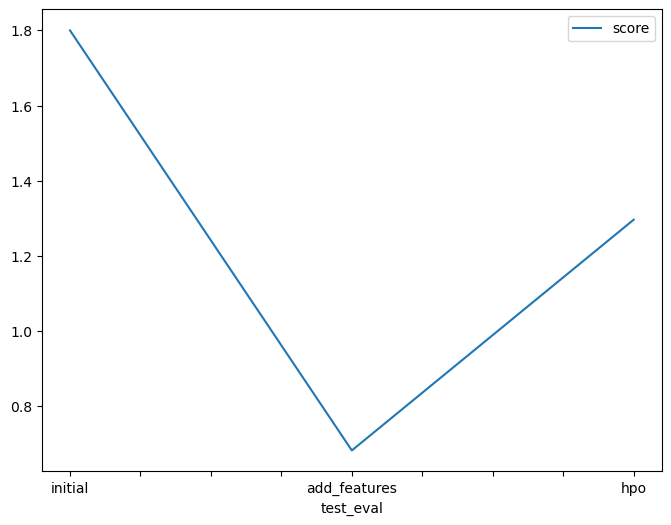

In [19]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.7998, 0.68259, 1.29634]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [20]:
# The 3 hyperparameters we tuned with the kaggle score as the result
hyperparams_df = pd.DataFrame({
    "model": ["initial_model", "add_features_model", "hpo_model"],
    "hpo1": ['default_vals', 'default_vals', 'GBM: num_leaves: lower=26, upper=66'],
    "hpo2": ['default_vals', 'default_vals', 'NN_TORCH: dropout_prob: 0.0, 0.5'],
    "hpo3": ['default_vals', 'default_vals', 'GBM: num_boost_round: 100'],
    "score": [1.7998, 0.68259, 1.29634]
})

In [21]:
hyperparams_df.head()

model                                 hpo1  \
0       initial_model                         default_vals   
1  add_features_model                         default_vals   
2           hpo_model  GBM: num_leaves: lower=26, upper=66   

                               hpo2                       hpo3    score  
0                      default_vals               default_vals  1.79980  
1                      default_vals               default_vals  0.68259  
2  NN_TORCH: dropout_prob: 0.0, 0.5  GBM: num_boost_round: 100  1.29634

In [22]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [23]:
sub_new = pd.read_csv('submission_new_features.csv')

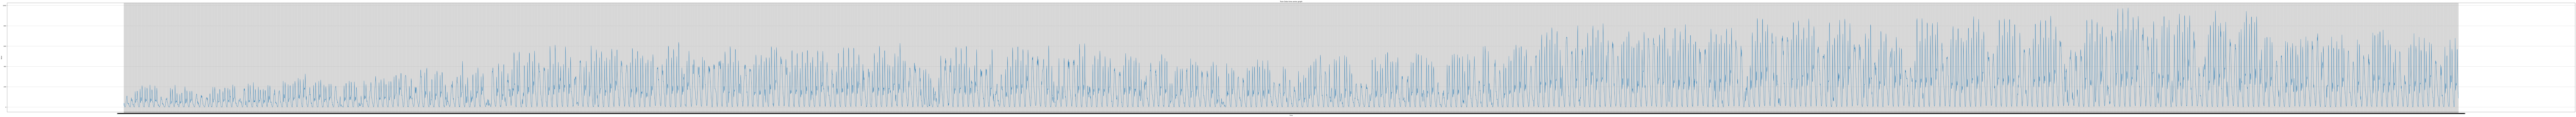

In [ ]:
import matplotlib.pyplot as plt
series = train["count"].to_numpy()
time = train["datetime"].to_numpy()


plt.figure(figsize=(350, 15))
plot_series(time, series)
plt.title("Train Data time series graph")
#plot_series(time1, series1)
plt.show()

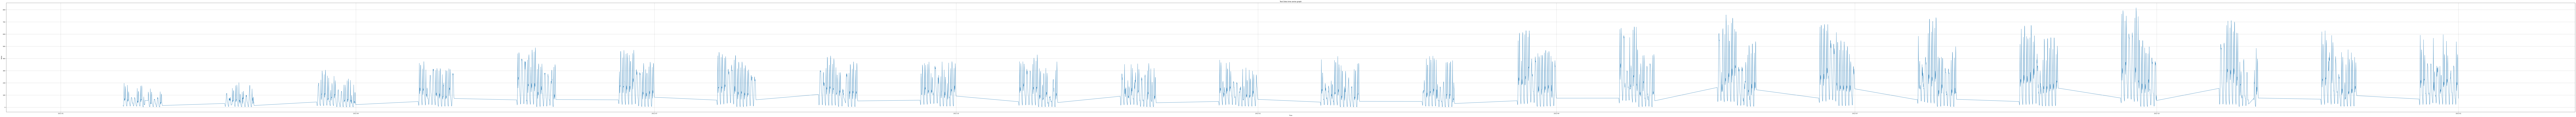

In [25]:
sub_new.loc[:, "datetime"] = pd.to_datetime(sub_new.loc[:, "datetime"])

series1 = sub_new["count"].to_numpy()
time1 = sub_new["datetime"].to_numpy()

plt.figure(figsize=(350, 15))
#plot_series(time, series)
plot_series(time1, series1)
plt.title("Test Data time series graph")
plt.show()

In [27]:
!jupyter nbconvert --to html project_notebook.ipynb

2269.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


[NbConvertApp] WARNING | pattern 'project_notebook.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

In [28]:
cd ~/documents


[Errno 2] No such file or directory: '/home/sagemaker-user/documents'
/home/sagemaker-user/cd0385-project-starter
